In [1]:
import numpy as np
import matplotlib.pyplot as plt

1. Выберите произвольное начальное состояние ("sunny", "cloudy" или "rainy") и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную states.

In [ ]:
state_weather = ("sunny", "cloudy", "rainy")
transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))
current_state = np.random.choice(state_weather)
states = [current_state]
for i in range(20000):
    current_index = state_weather.index(current_state)
    next_state_index = np.random.choice(3, p=transition_matrix[current_index])
    next_state = state_weather[next_state_index]
    states.append(next_state)
    current_state = next_state
states = np.array(states[1:])
print(states.shape)

(20000,)


2.  На основе массива states рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве states[:n] для n, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте n, по у - частоту для каждого из трех типов погоды.

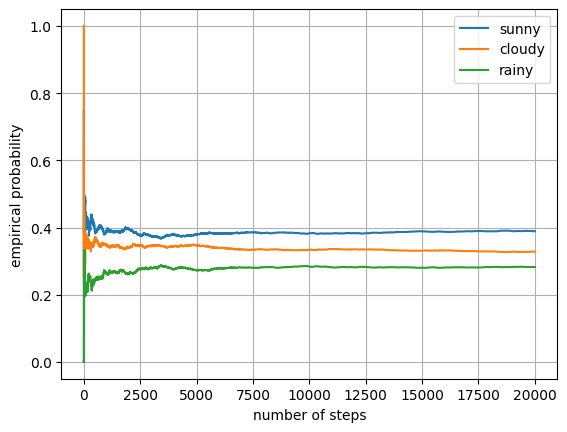

In [ ]:
def f(arr, weather):
    return np.sum(arr == weather) / len(arr)


frequency_sunny = np.empty(20000)
frequency_cloudy = np.empty(20000)
frequency_rainy = np.empty(20000)

for i in range(1, 20001):
  frequency_sunny[i - 1] = f(states[: i], 'sunny')
  frequency_cloudy[i - 1] = f(states[: i], 'cloudy')
  frequency_rainy[i - 1] = f(states[: i], 'rainy')

plt.plot(range(1, 20001), frequency_sunny, label='sunny')
plt.plot(range(1, 20001), frequency_cloudy, label='cloudy')
plt.plot(range(1, 20001), frequency_rainy, label='rainy')

plt.xlabel('number of steps')
plt.ylabel('empirical probability')
plt.legend()
plt.grid(True)

3. . Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей, а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [ ]:
pi_1 = frequency_sunny[-1]
pi_2 = frequency_cloudy[-1]
pi_3 = frequency_rainy[-1]

print("стационарные значения с картинки", pi_1, pi_2, pi_3, '\n')
pi = np.array([pi_1, pi_2, pi_3])
print('pi * P = ', pi @ transition_matrix, '///почти похоже на правду, всё-таки 20000 это не бесконечность', '\n')

print(np.linalg.matrix_power(transition_matrix, 100))


стационарные значения с картинки 0.38925 0.32825 0.2825 

pi * P =  [0.388525 0.332825 0.27865 ] ///почти похоже на правду, всё-таки 20000 это не бесконечность 

[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]]


Я искренне не понимаю, где задание 4(

5. Методом Метрополиса — Гастингса постройте выборку из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей B = [[40, -26], [-26, 25]]. Сравните плоность по выборке (двумерную гистограмму) и теоретическую плотность.

In [76]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

In [77]:
def proposal(current, sigma, **kwargs):
    _ = kwargs
    current = np.asarray(current)
    sigma = np.asarray(sigma)
    return current + sigma * np.random.randn(*current.shape)

In [78]:
from scipy.stats import norm

def mixture(x, **kwargs):
  _ = kwargs
  return norm(0, 1).pdf(x)

In [80]:
x_samp = metroplis(3, mixture, proposal, 10000, sigma=1)
y_samp = metroplis(3, mixture, proposal, 10000, sigma=1)

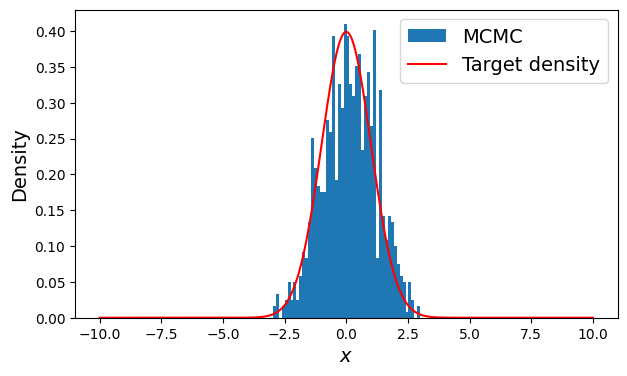

In [72]:
plt.figure(figsize=(7, 4))
plt.hist(x_samp, bins=50, density=True, label='MCMC')
x = np.linspace(-10, 10, 1000)
plt.plot(x, mixture(x), label='Target density', c='r')
plt.legend(fontsize=14)
plt.xlabel('$x$', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.show()

In [81]:
res = np.array([x_samp, y_samp])


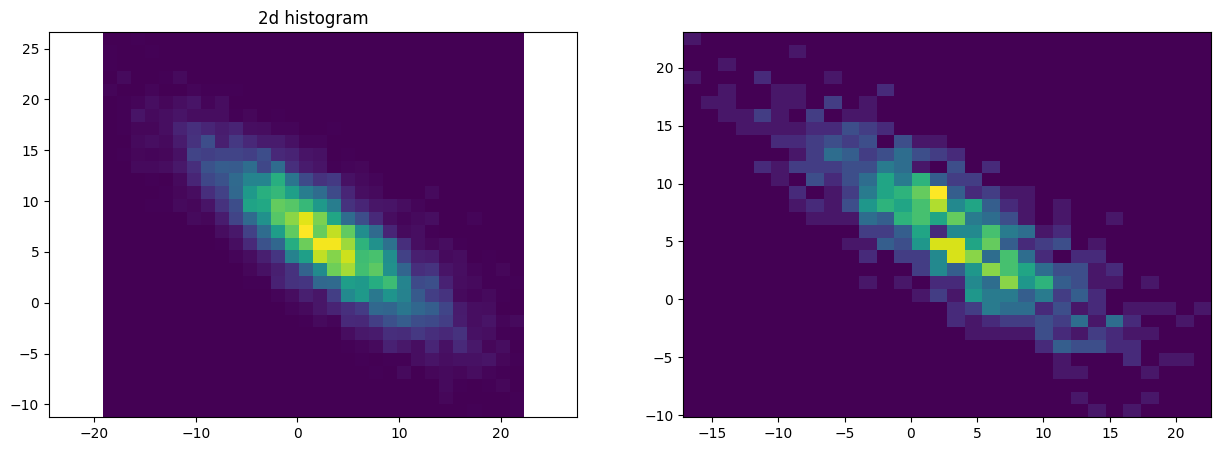

2.5965503123585942 6.372404784951343
[[ 40.26249057 -25.24641485]
 [-25.24641485  24.16356985]]


In [82]:
matr_transform = np.linalg.cholesky(np.array([40, -26, -26, 25]).reshape((2, 2)))
res = np.array([3, 6]).reshape(2, 1) + matr_transform @ res

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.patch.set_facecolor('xkcd:white')
ax[0].hist2d(res[0], res[1], bins=30)
ax[0].axis('equal')
ax[0].set_title("2d histogram")


mean = [3, 6]
cov = [[40, -26], [-26, 25]]
x, y = np.random.multivariate_normal(mean, cov, 1000).T
ax[1].hist2d(x, y, bins=30)

plt.show()
print(res[0].mean(), res[1].mean())
print(np.cov(res[0], res[1]))



